In [1]:
from PIL import Image
from pylab import *
 


In [2]:
def histeq(im,nbr_bins=256):
    """ 对一幅灰度图像进行直方图均衡化"""
    im = array(im,'f')# 由于可能对im1直接进行运算，对整型的像
                           #素数据的除运算，会导致小数丢失。故需要
                           #增加'f'option
    # 计算图像的直方图
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # 归一化
   
   
    
    # 使用累积分布函数的线性插值，计算新的像素值
    im2 = interp(im.flatten(),bins[:-1],cdf)
 
    return im2.reshape(im.shape), cdf

C:\Users\Asus-\anaconda3\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.


(1152, 1728, 3)
(256,)


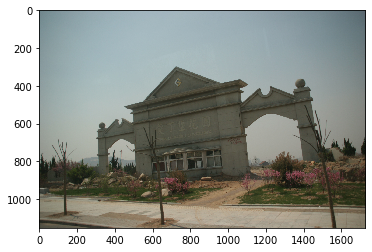

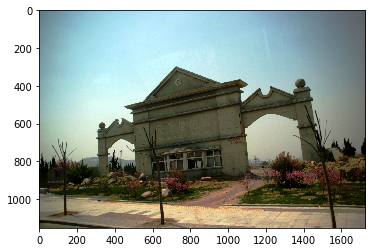

In [21]:
%matplotlib inline
pil_im = array(Image.open('IMG_2546.jpg'))
plt.figure('1')
plt.imshow(pil_im)
img, cdf = histeq(pil_im)

print(img.shape)
print(cdf.shape)
img = Image.fromarray(uint8(img))
plt.figure('2')
plt.imshow(img)

C:\Users\Asus-\anaconda3\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.


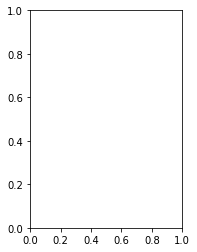

In [16]:
from PIL import Image
from pylab import *
from numpy import *


def histeq(im,nbr_bins = 256):
    """对一幅灰度图像进行直方图均衡化"""
    #计算图像的直方图
    #在numpy中，也提供了一个计算直方图的函数histogram(),第一个返回的是直方图的统计量，第二个为每个bins的中间值
    imhist,bins = histogram(im.flatten(),nbr_bins,normed= True)
    cdf = imhist.cumsum()   #
    cdf = 255.0 * cdf / cdf[-1]
    #使用累积分布函数的线性插值，计算新的像素值
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape),cdf



pil_im = Image.open('IMG_2546.jpg')   #打开原图
pil_im_gray = pil_im#.convert('L')     #转化为灰度图像
pil_im_gray.show()         #显示灰度图像

im = array(Image.open('IMG_2546.jpg'))#.convert('L'))
# figure()
# hist(im.flatten(),256)

im2,cdf = histeq(im)
# figure()
# hist(im2.flatten(),256)
# show()
plt.subplot(122)
im2 = Image.fromarray(uint8(im2))
im2.show()
# print(cdf)
# plot(cdf)
im2.save("junheng.jpg")


In [31]:
a = list( range(0, 6) )
for i in a:
    i = 0
a[:-1]

[0, 1, 2, 3, 4]

In [30]:
help(histogram)

Help on function histogram in module numpy:

histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
    Compute the histogram of a set of data.
    
    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines a monotonically increasing array of bin edges,
        including the rightmost edge, allowing for non-uniform bin widths.
    
        .. versionadded:: 1.11.0
    
        If `bins` is a string, it defines the method used to calculate the
        optimal bin width, as defined by `histogram_bin_edges`.
    
    range : (float, float), optional
        The lower and upper range of the bins.  If not provided, range
        is simply ``(a.min(), a.max())``.  Values outside the range are
      